# SQL 語法入門

> 快速啟動

郭耀仁

## 摘要

- 環境設定
- 釋義的部分
- 從 `SELECT` 與 `FROM` 開始

## 環境設定

## 為了讓學生能夠直接進入學習 SQL 的環節，我們設置了一個[雲端環境](https://mybinder.org/v2/gh/yaojenkuo/introduction-to-sql/master)

這個[雲端環境](https://mybinder.org/v2/gh/yaojenkuo/introduction-to-sql/master)是透過下面幾個應用程式所搭建而成：
- [Binder](https://mybinder.org/)
- [GitHub](https://github.com/)
- [Project Jupyter](https://jupyter.org/)
- [SQLite](https://www.sqlite.org/index.html)
- [Python](https://www.python.org/)

## SQL 語法會用一個 Python 長字串包裝起來

長字串由開頭的 `"""` 與結尾的 `"""`組合起來。

```python
sql_query = """
SELECT column_name FROM table_name; -- SQL 語法用一個長字串包裝起來
"""
```

## SQL 語法會透過 `pandas` 與 `sqlite3` 傳送給 SQLite 資料庫

```python
# 連結資料庫
import sqlite3
import pandas as pd

conn = sqlite3.connect('database_name.db')
pd.read_sql(sql_query, conn)
```

## 輸出會得到一個 `DataFrame`，舉例來說

In [1]:
# 連結資料庫
import sqlite3
import pandas as pd

conn = sqlite3.connect('nba.db')

In [2]:
sql_query = """
SELECT * FROM players WHERE firstName = 'LeBron';
"""
pd.read_sql(sql_query, conn)

,firstName,lastName,temporaryDisplayName,personId,teamId,jersey,isActive,pos,heightFeet,heightInches,heightMeters,weightPounds,weightKilograms,dateOfBirthUTC,nbaDebutYear,yearsPro,collegeName,lastAffiliation,country,isallStar
0,LeBron,James,"James, LeBron",2544,1610612747,23,True,F,6,9,2.06,250,113.4,1984-12-30,2003,16,None,St. Vincent-St. Mary HS (OH)/USA,USA,None


## 釋義的部分

## 什麼是 SQL

> SQL(發音為 ess-que-ell 或 sequel)，是一個為資料庫所設計的語法，於 1970 年代由 IBM 開發問世，後來成為業界通用的資料庫標準語法。使用 SQL 可以針對資料庫進行 CRUD 的操作，其中 C 指的是創建（Create）、R 指的是查詢（Read）、U 指的是更新（Update）、D 指的是刪除（Delete）。

## 什麼是資料庫

> 資料庫是具有屬性（Attributes）的觀測值（Records）集合，由資料與資料描述（Metadata）組合而成。

## 例如具有多個屬性的隊伍觀測值

In [3]:
sql_query = """
SELECT * FROM teams LIMIT 1;
"""
pd.read_sql(sql_query, conn)

,isNBAFranchise,isAllStar,city,altCityName,fullName,tricode,teamId,nickname,urlName,teamShortName,confName,divName
0,True,False,Atlanta,Atlanta,Atlanta Hawks,ATL,1610612737,Hawks,hawks,Atlanta,East,Southeast


## 例如具有多個屬性的球員觀測值

In [4]:
sql_query = """
SELECT * FROM players LIMIT 1;
"""
pd.read_sql(sql_query, conn)

,firstName,lastName,temporaryDisplayName,personId,teamId,jersey,isActive,pos,heightFeet,heightInches,heightMeters,weightPounds,weightKilograms,dateOfBirthUTC,nbaDebutYear,yearsPro,collegeName,lastAffiliation,country,isallStar
0,Vince,Carter,"Carter, Vince",1713,1610612737,15,True,G-F,6,6,1.98,220,99.8,1977-01-26,1998,21,North Carolina,North Carolina/USA,USA,None


## 所以，Metadata 到底是什麼

![](https://media.giphy.com/media/xT0xeif517lOYwnH2g/giphy.gif)

Source: <https://giphy.com/>

## Metadata 是描述資料庫中結構的內容，也以資料的形式存在於資料庫中

## 描述資料庫中有哪些表格

從 `sqlite_master` 表格中查詢。

In [5]:
sql_query = """
SELECT type, name FROM sqlite_master;
"""
pd.read_sql(sql_query, conn)

,type,name
0,table,teams
1,table,rosters
2,table,players
3,table,careerSummaries


## 描述資料庫中表格有哪些欄位

`PRAGMA table_info(tbl_name);`

In [6]:
sql_query = """
PRAGMA table_info(teams);
"""

In [7]:
pd.read_sql(sql_query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,isNBAFranchise,TEXT,0,None,0
1,1,isAllStar,TEXT,0,None,0
2,2,city,TEXT,0,None,0
3,3,altCityName,TEXT,0,None,0
4,4,fullName,TEXT,0,None,0
5,5,tricode,TEXT,0,None,0
6,6,teamId,INTEGER,0,None,1
7,7,nickname,TEXT,0,None,0
8,8,urlName,TEXT,0,None,0
9,9,teamShortName,TEXT,0,None,0


## 為什麼 SQL

- SQL 是資料科學團隊、軟體開發團隊最為倚賴的語言之一
- SQL 對程式語言有良好的介接

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def get_value_ratios(df, col_name):
    return df[col_name].value_counts() / df[col_name].value_counts().sum()
    
def get_checkbox_ratios(df, col_pattern):
    channel_names = []
    channel_checks = []
    for col_name in df.columns:
        if (col_pattern in col_name) and ('OTHER_TEXT' not in col_name):
            channel_name = df[col_name].value_counts().index
            channel_check = df[col_name].value_counts().values
            if channel_name.size != 0:
                channel_names.append(channel_name[0])
                channel_checks.append(channel_check[0])
    channel_counts = pd.Series(channel_checks, index=channel_names)
    channel_ratios = channel_counts / channel_counts.sum()
    channel_ratios_sorted = channel_ratios.sort_values(ascending=False)
    return channel_ratios_sorted

survey_2019 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2019/multiple_choice_responses.csv", encoding='ISO-8859-1', skiprows=[1], low_memory=False)
da_2019 = survey_2019[survey_2019['Q5'] == 'Data Analyst']

In [9]:
def get_ax(ans_ser, plot_title, ax):
    ax = ax
    ans_ser = ans_ser[:10][::-1]
    ax.barh(ans_ser.index, ans_ser.values, color=['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'r', 'c'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title(plot_title)
    
def plot_ans_18_19(ans_18_ser, ans_19_ser):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    get_ax(ans_18_ser, "What programming languages do you use on a regular basis?", ax1)
    get_ax(ans_19_ser, "What programming language would you recommend \n an aspiring data scientist to learn first?", ax2)
    plt.tight_layout()
    plt.show()
    
ans_18 = get_checkbox_ratios(da_2019, 'Q18')
ans_19 = get_value_ratios(da_2019, 'Q19')

## 舉 2019 年的 [Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2019) 為例

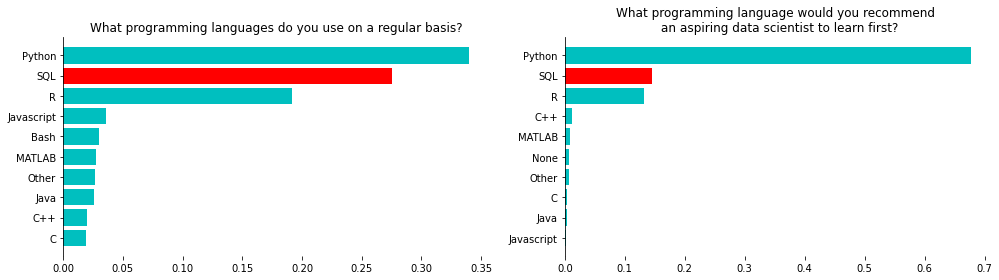

In [10]:
plot_ans_18_19(ans_18, ans_19)

## 為什麼資料庫

- 資料庫是網頁應用程式、互動地圖或內容管理系統不可或缺的後端
- 使用資料庫可以幫助我們將資料的 CRUD 規模化與自動化

## 資料的 CRUD

- C(reate) 創建
- R(ead) 讀取
- U(pdate) 更新
- D(elete) 刪除

## 從 `SELECT` 與 `FROM` 開始

## 兩個維度的資料

- 水平：觀測值（Observations）、列（Rows）
- 垂直：變數（Variables）、欄（Columns）

## 使用 `SELECT *` 查詢表格 `teams` 中的所有觀測值與變數

- 使用 `*` 代表「所有」的變數
- 使用 `FROM` 指定表格
- 使用 `;` 表示查詢的終結

In [11]:
sql_query = """
SELECT * FROM teams;
"""
pd.read_sql(sql_query, conn)

,isNBAFranchise,isAllStar,city,altCityName,fullName,tricode,teamId,nickname,urlName,teamShortName,confName,divName
0,True,False,Atlanta,Atlanta,Atlanta Hawks,ATL,1610612737,Hawks,hawks,Atlanta,East,Southeast
1,True,False,Boston,Boston,Boston Celtics,BOS,1610612738,Celtics,celtics,Boston,East,Atlantic
2,True,False,Cleveland,Cleveland,Cleveland Cavaliers,CLE,1610612739,Cavaliers,cavaliers,Cleveland,East,Central
3,True,False,New Orleans,New Orleans,New Orleans Pelicans,NOP,1610612740,Pelicans,pelicans,New Orleans,West,Southwest
4,True,False,Chicago,Chicago,Chicago Bulls,CHI,1610612741,Bulls,bulls,Chicago,East,Central
5,True,False,Dallas,Dallas,Dallas Mavericks,DAL,1610612742,Mavericks,mavericks,Dallas,West,Southwest
6,True,False,Denver,Denver,Denver Nuggets,DEN,1610612743,Nuggets,nuggets,Denver,West,Northwest
7,True,False,Golden State,Golden State,Golden State Warriors,GSW,1610612744,Warriors,warriors,Golden State,West,Pacific
8,True,False,Houston,Houston,Houston Rockets,HOU,1610612745,Rockets,rockets,Houston,West,Southwest
9,True,False,LA,LA Clippers,LA Clippers,LAC,1610612746,Clippers,clippers,LA Clippers,West,Pacific


## 在 `SELECT` 後指定變數，並以逗號間隔

In [12]:
sql_query = """
SELECT firstName, lastName, dateOfBirthUTC FROM players;
"""
pd.read_sql(sql_query, conn)

,firstName,lastName,dateOfBirthUTC
0,Vince,Carter,1977-01-26
1,Tyson,Chandler,1982-10-02
2,LeBron,James,1984-12-30
3,Carmelo,Anthony,1984-05-29
4,Kyle,Korver,1981-03-17
...,...,...,...
499,Matt,Thomas,1994-08-04
500,Tariq,Owens,1995-06-30
501,Javonte,Green,1993-07-23
502,Juwan,Morgan,1997-04-17


## 使用 `DISTINCT` 暸解類別變數的獨一值

In [13]:
sql_query = """
SELECT DISTINCT confName, divName FROM teams;
"""
pd.read_sql(sql_query, conn)

,confName,divName
0,East,Southeast
1,East,Atlantic
2,East,Central
3,West,Southwest
4,West,Northwest
5,West,Pacific


## 使用 `LIMIT` 侷限查詢結果的觀測值數

In [14]:
sql_query = """
SELECT city FROM teams LIMIT 5;
"""
pd.read_sql(sql_query, conn)

,city
0,Atlanta
1,Boston
2,Cleveland
3,New Orleans
4,Chicago


## 使用 `AS` 為查詢結果建立別名

In [15]:
sql_query = """
SELECT fullName AS team_name FROM teams LIMIT 5;
"""
pd.read_sql(sql_query, conn)

,team_name
0,Atlanta Hawks
1,Boston Celtics
2,Cleveland Cavaliers
3,New Orleans Pelicans
4,Chicago Bulls


## 這是目前涵蓋的查詢保留字

使用 SQL 語法時，保留字順序必須要遵守。

```sql
SELECT DISTINCT column_name AS alias_name FROM table_name LIMIT n_obs;
```

## 前往快速啟動：隨堂練習

[快速啟動：隨堂練習](https://mybinder.org/v2/gh/yaojenkuo/introduction-to-sql/master?filepath=01-exercises.ipynb)